# LSTM 레이어 (Long Short-Term Memory)
- SimpleRNN 레이어에 치명적인 단점은 입력 데이터가 길어 질 수록 즉, 타임 스텝이 커질수록 학습 능력이 떨어진다.
- 이를 장기의존성(Long-Term Dependecy)문제라고 하며, 입력 데이터와 출력 사이의 길이가 멀어질 수록 연관 관계가 적어진다.
- 순환 신경망 의 한 유형으로, 시간적으로 멀리 떨어진 데이터 간의 장기 의존성 학습할 수 있는 능력이 특징
- LSTM의 핵심은 '셀 상태'(cell state)라는 내부 메커니즘을 통해 정보를 장기간 저장하고, 필요한 정보만을 선택적으로 통과시키거나 수정할 수 있는 구조

In [1]:
import numpy as np 

X = []
y = []

for i in range(3000):
    lst = np.random.rand(100)
    # replace : 중복 허용 여부 
    idx = np.random.choice(100, 2, replace=False)
    zeros = np.zeros(100)

    zeros[idx] = 1
    X.append(np.array(list(zip(zeros, lst))))
    # prod 모든 array 의 곱 - [1,2,3] np.prod([1,2,3]) = 1 * 2 * 3 = 6
    y.append(np.prod(lst[idx]))

print(X[0], y[0])

[[0.         0.73735804]
 [0.         0.1269054 ]
 [1.         0.25054997]
 [0.         0.33693264]
 [0.         0.00867323]
 [0.         0.81420812]
 [0.         0.12809793]
 [0.         0.61918622]
 [0.         0.14350147]
 [0.         0.64585563]
 [0.         0.28907437]
 [0.         0.29631134]
 [0.         0.3228121 ]
 [0.         0.8956177 ]
 [0.         0.09200419]
 [0.         0.05246325]
 [0.         0.56177269]
 [0.         0.39392381]
 [0.         0.98316942]
 [0.         0.71419989]
 [0.         0.03437084]
 [0.         0.9182749 ]
 [0.         0.65275621]
 [0.         0.39768335]
 [0.         0.55580078]
 [0.         0.119297  ]
 [0.         0.16880755]
 [0.         0.63568009]
 [0.         0.40483196]
 [0.         0.43892732]
 [0.         0.19532725]
 [0.         0.23880467]
 [0.         0.70415625]
 [0.         0.10567262]
 [0.         0.71204224]
 [0.         0.73875778]
 [0.         0.50174818]
 [0.         0.08828325]
 [0.         0.59839506]
 [0.         0.55911848]


In [2]:
import tensorflow as tf
from keras import Input

model = tf.keras.Sequential([
    Input(shape=[100, 2]),
    tf.keras.layers.SimpleRNN(30, return_sequences=True),
    tf.keras.layers.SimpleRNN(30),
    tf.keras.layers.Dense(1)
])

In [3]:
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 100, 30)        │           990 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 30)             │         1,830 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,851 (11.14 KB)

 Trainable params: 2,851 (11.14 KB)

 Non-trainable params: 0 (0.00 B)

In [1]:
X = np.array(X)
y = np.array(y)

history = model.fit(X[:2560], y[:2560], epochs=100, validation_split=0.2)

NameError: name 'np' is not defined

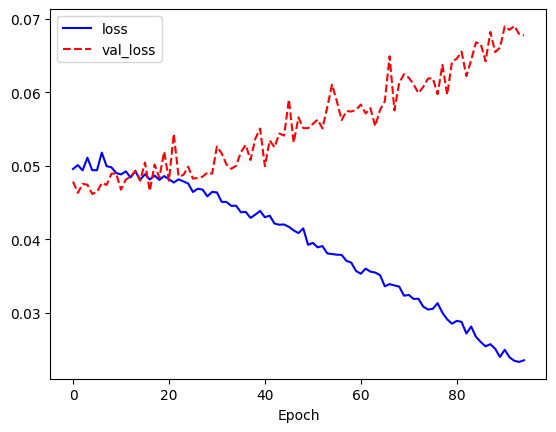

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'][5:], 'b', label='loss')
plt.plot(history.history['val_loss'][5:], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [12]:
model.evaluate(X[:2560], y[:2560])
pred = model.predict(X[2560:2565])

for i in range(5):
    print(y[2560+i], '\t', pred[i][0], '\tdiff :', abs(pred[i][0] - y[2560+i]))

80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0234
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
0.20856106745055455 	 0.1611293 	diff : 0.0474317716245963
0.22999482304467445 	 0.2790032 	diff : 0.049008379870517205
0.06715682293522178 	 0.531705 	diff : 0.46454819892299354
0.14581891092595858 	 0.30578834 	diff : 0.1599694272583981
0.034466242257180535 	 0.36661047 	diff : 0.3321442251767489


In [13]:
pred = model.predict(X[2560:])
fail = 0

for i in range(len(pred)):
    # 절대값으로 0.04 이상 오답으로 처리
    if abs(pred[i][0] - y[2560+i]) >= 0.04:
        fail += 1

print('correctness :', (440-fail) / 440 * 100, '%')

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
correctness : 11.59090909090909 %


In [14]:
model = tf.keras.Sequential([
    Input(shape=[100, 2]),
    tf.keras.layers.LSTM(30, return_sequences=True),
    tf.keras.layers.LSTM(30),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 30)        │         3,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 30)             │         7,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,311 (44.18 KB)

 Trainable params: 11,311 (44.18 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
X = np.array(X)
y = np.array(y)

history = model.fit(X[:2560], y[:2560], epochs=100, validation_split=0.2)

Epoch 1/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0500 - val_loss: 0.0455
Epoch 2/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0493 - val_loss: 0.0463
Epoch 3/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0503 - val_loss: 0.0454
Epoch 4/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0508 - val_loss: 0.0453
Epoch 5/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0466 - val_loss: 0.0465
Epoch 6/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0514 - val_loss: 0.0454
Epoch 7/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0482 - val_loss: 0.0453
Epoch 8/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0483 - val_loss: 0.0455
Epoch 9/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0489 - val_loss: 0.0457
Epoch 10/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0512 - val_loss: 0.0454
Epoch 11/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0487 - val_loss: 0.0451
Epoch 12/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step

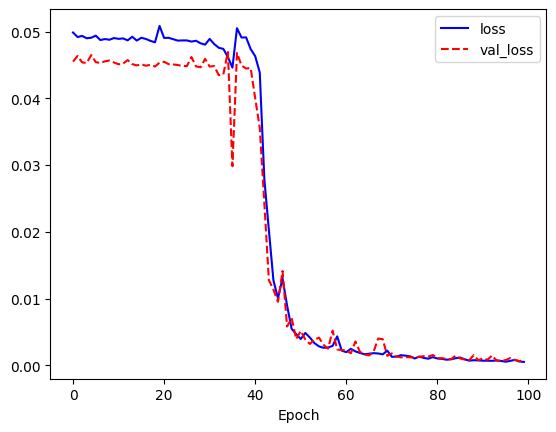

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], 'b', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [19]:
model.evaluate(X[:2560], y[:2560])
pred = model.predict(X[2560:2565])

for i in range(5):
    print(y[2560+i], '\t', pred[i][0], '\tdiff :', abs(pred[i][0] - y[2560+i]))

80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 6.7712e-04
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
0.20856106745055455 	 0.19945532 	diff : 0.00910574661544103
0.22999482304467445 	 0.21899757 	diff : 0.01099725515259986
0.06715682293522178 	 0.077332065 	diff : 0.010175241574170005
0.14581891092595858 	 0.15440309 	diff : 0.008584179551031162
0.034466242257180535 	 0.037063573 	diff : 0.002597330298599876


In [20]:
pred = model.predict(X[2560:])

fail = 0

for i in range(len(pred)):
    if abs(pred[i][0] - y[2560+i]) >= 0.04:
        fail += 1

print('correctness : ', (440-fail) / 440 * 100 , '%')

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
correctness :  89.54545454545455 %


In [21]:
import yfinance as yf 
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras import Input, layers
import matplotlib.pyplot as plt

In [40]:
# 데이터 다운로드
data = yf.download('AAPL', start='2023-01-01', end='2023-12-31')
data_close = data[['Close']]

[*********************100%%**********************]  1 of 1 completed


In [41]:
# 데이터 전처리
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_close)

In [42]:
# 시계열 데이터 함수 생성
def  create_sequences(data, time_steps):
    Xs, ys = [], []
    for i in range(len(data) - time_steps):
        Xs.append(data[i:(i + time_steps), 0])
        ys.append(data[i + time_steps, 0])
    return np.array(Xs), np.array(ys)

In [43]:
# 함수를 이용해서 시계열 데이터 생성
TIME_STEPS = 50
X, y = create_sequences(scaled_data, TIME_STEPS)

In [44]:
# 학습 및 검증 데이터 분할 - 시계열 데이터는 데이터를 섞으면 안된다. (shuffle=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [45]:
X_train.shape

(160, 50)

In [46]:
# LSTM 모델 구성
model = Sequential([
    Input(shape=(X_train.shape[1], 1)),
    LSTM(16),
    Dense(1)
])

In [47]:
model.compile(optimizer='adam', loss='mse')

In [48]:
# 모델 훈련
history = model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=1)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.5919
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2897
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0985
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0127
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0167
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0062
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0073
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0065
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0056
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0055
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0052
Epoch 12/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0050
Epoch 13/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0045
Epoch 14/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0046
Epoch 15/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0044
Epoch 16/50
10/10 

In [49]:
# 모델 평가
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0062  


0.005784500390291214

In [50]:
# 예측
y_pred = model.predict(X_test)

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/stepWARNING:tensorflow:5 out of the last 19 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000017CBA4BF1A0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


In [51]:
y_pred.shape, y_test.shape

((40, 1), (40,))

In [52]:
# 원래 값으로 복원 
y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_unscaled = scaler.inverse_transform(y_pred)

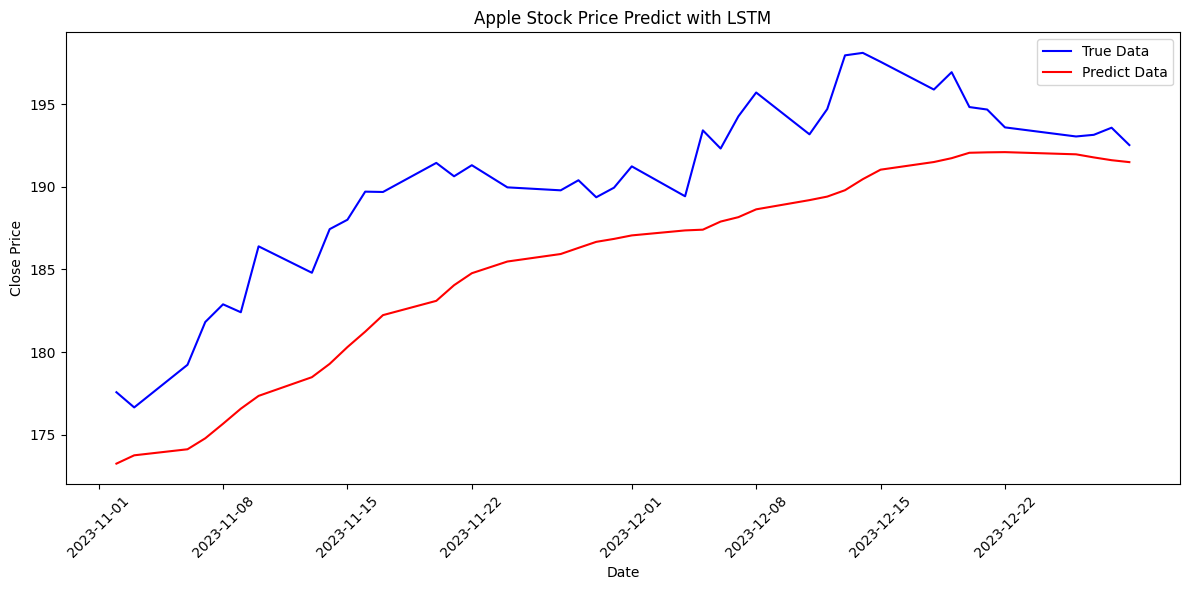

In [53]:
# 시각화 
plt.figure(figsize=(12, 6))
plt.plot(data_close.index[-len(y_test_unscaled):], y_test_unscaled, label='True Data', color='blue')
plt.plot(data_close.index[-len(y_test_unscaled):], y_pred_unscaled, label='Predict Data', color='red')
plt.title('Apple Stock Price Predict with LSTM')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()